# Exploratory Data Analysis (EDA)

## Introducción
Este análisis exploratorio tiene como objetivo comprender mejor la distribución de las variables clave en los datos, así como las relaciones entre ellas. Esto nos permitirá tomar decisiones informadas en las etapas posteriores del proyecto.


## 1. Cargar Librerías y Datos


In [1]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm



## 2. Configuración del Entorno

In [3]:
# Configuración de opciones de pandas
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.4f}'.format

# Configuración de estilo para las visualizaciones
sns.set(style="whitegrid")

# Configuración para reproducibilidad
np.random.seed(42)

data_dir = '../data/'
models_dir = '../models/'


## 3. Carga de Datos


In [5]:
# Cargar los datasets de transacciones
df = pd.read_excel(f'{data_dir}db_.xlsx', 'BBDD')
df.shape

(92212, 6)

In [6]:
df.head(3)

,date,expirationDate,paymentDate,sector,payerSalesSegment,amountFinanced
0,2020-11-05,2020-12-04,2020-11-29,Consumo Basico,6,1190000.0000
1,2020-11-05,2020-12-04,2020-11-15,Ganadería,6,120987.0000
2,2020-11-05,2020-12-04,2020-11-15,Ganadería,6,299285.0000


## 4. Análisis Descriptivo de los Datos

In [5]:
df.info()
# contiene null paymentdate,sector y amountfinanced

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92212 entries, 0 to 92211
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               92212 non-null  datetime64[ns]
 1   expirationDate     92212 non-null  datetime64[ns]
 2   paymentDate        84946 non-null  datetime64[ns]
 3   sector             90543 non-null  object        
 4   payerSalesSegment  92212 non-null  int64         
 5   amountFinanced     92210 non-null  float64       
dtypes: datetime64[ns](3), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


In [6]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
date,92212,2021-09-02 03:48:08.214115584,2020-11-05 00:00:00,2021-05-06 00:00:00,2021-09-10 00:00:00,2022-01-02 00:00:00,2022-05-28 00:00:00,NaN
expirationDate,92212,2021-10-12 17:55:25.467401216,2020-11-15 00:00:00,2021-06-15 00:00:00,2021-10-18 00:00:00,2022-02-13 00:00:00,2022-10-10 00:00:00,NaN
paymentDate,84946,2021-09-25 20:42:09.230334720,2020-09-04 00:00:00,2021-06-05 00:00:00,2021-10-14 00:00:00,2022-01-15 00:00:00,2022-05-28 00:00:00,NaN
payerSalesSegment,92212.0000,5.1003,1.0000,5.0000,5.0000,6.0000,6.0000,0.8777
amountFinanced,92210.0000,5462066.3549,0.0000,198361.0000,641410.0000,2790387.7500,4181266120.0000,33269269.6644


In [13]:
df.describe(include=object)

,sector
count,90543
unique,31
top,Retail
freq,16503


In [55]:
## contiene duplicados
df.drop_duplicates().shape,df.shape

((80779, 9), (92212, 9))

In [57]:
df.columns

Index(['date', 'expirationDate', 'paymentDate', 'sector', 'payerSalesSegment',
       'amountFinanced', 'expirationDays', 'paymentDays', 'vd'],
      dtype='object')

In [75]:
df_[df_[0]==1].vd.value_counts()

vd
0    69570
1      101
Name: count, dtype: int64

In [74]:
df_[df_[0]>1].vd.value_counts()

vd
0    3572
1       1
Name: count, dtype: int64

In [69]:
df_[df_[0]>1].amountFinanced.value_counts()

amountFinanced
73185.0000       60
144491.0000      49
195160.0000      38
114228.0000      38
254992.0000      36
                 ..
711671.0000       1
21420000.0000     1
36589.0000        1
734825.0000       1
334511.0000       1
Name: count, Length: 1460, dtype: int64

### Analisis Univariado Y Bivaridado

### payerSalesSegment

In [ ]:
# me llamo la atencion el zipcode maximo 99990000.0
# los valores faltantes

In [22]:
df['payerSalesSegment'].value_counts(1,dropna=False).sort_index(ascending=False)

payerSalesSegment
6    0.299939
5    0.597352
4    0.037880
3    0.043942
2    0.009630
1    0.011257
Name: proportion, dtype: float64

In [ ]:
df.groupby('payerSalesSegment')['amountFinanced'].describe(percentiles=[0.05,0.5,0.95]).T

## se aprecia valores extremos para cada segmentos

payerSalesSegment,1,2,3,4,5,6
count,1038.00,888.00,4052.00,3493.00,55081.00,27658.00
mean,8231308.20,16692485.84,5114768.24,5526184.25,5946253.37,4076091.15
std,31864448.62,145792448.99,16291149.19,16524137.21,21861710.59,44029088.62
min,3278.00,0.00,0.00,903.00,0.00,0.00
5%,89243.20,40838.40,47074.90,67830.00,40976.00,45599.00
50%,1459539.00,911352.00,1146474.50,1190000.00,832052.00,353052.00
95%,27907125.00,17708747.00,21352997.05,22080844.60,25921951.00,13134568.90
max,551875136.00,2545222228.00,464636546.00,407986740.00,1260513617.00,4181266120.00


### sector

In [34]:
df['sector'].unique()

array(['Ganadería', 'Consumo Basico', 'Acuicultura y Pesca',
       'Construcción de Viviendas', 'Retail', 'Energía',
       'Telecomunicaciones', 'Mercados de Capitales', 'Servicios',
       'Comercio', 'Relacionados a Construccion', 'Quimicos y Maderas',
       'Maquinaria y Equipo', 'Educación', 'Transporte',
       'Industria Automotriz', nan, 'Hoteles, Restaurantes y Ocio',
       'Construcción Ingeniería e Infraestructura', 'Seguros e Isapres',
       'Envíos y Almacenamiento', 'Suministro de Agua',
       'Servicios de Salud', 'Minería y Metales',
       'Gobierno y Actividades Sociales', 'Agricultura y Relacionados',
       'Tecnología de la Información',
       'Laboratorios y Fabricación Productos Farmacéuticos', 'Aerolíneas',
       'Medios de Comunicación', 'Combustibles y Gas', 'Tabaco'],
      dtype=object)

In [39]:
df['sector'].value_counts(1,dropna=False).sort_index(ascending=False)*100

sector
Transporte                                            0.7353
Telecomunicaciones                                    1.0085
Tecnología de la Información                          0.2874
Tabaco                                                0.0011
Suministro de Agua                                    0.6095
Servicios de Salud                                    0.4338
Servicios                                             1.4174
Seguros e Isapres                                    12.6871
Retail                                               17.8968
Relacionados a Construccion                           1.6267
Quimicos y Maderas                                    3.7056
Minería y Metales                                     2.5919
Mercados de Capitales                                 0.1941
Medios de Comunicación                                0.1399
Maquinaria y Equipo                                   1.4304
Laboratorios y Fabricación Productos Farmacéuticos    0.1301
Industria Automot

In [35]:
df.groupby('sector')['amountFinanced'].describe(percentiles=[0.05,0.5,0.95]).T

sector,Acuicultura y Pesca,Aerolíneas,Agricultura y Relacionados,Combustibles y Gas,Comercio,Construcción Ingeniería e Infraestructura,Construcción de Viviendas,Consumo Basico,Educación,Energía,Envíos y Almacenamiento,Ganadería,Gobierno y Actividades Sociales,"Hoteles, Restaurantes y Ocio",Industria Automotriz,Laboratorios y Fabricación Productos Farmacéuticos,Maquinaria y Equipo,Medios de Comunicación,Mercados de Capitales,Minería y Metales,Quimicos y Maderas,Relacionados a Construccion,Retail,Seguros e Isapres,Servicios,Servicios de Salud,Suministro de Agua,Tabaco,Tecnología de la Información,Telecomunicaciones,Transporte
count,7121.0000,28.0000,1592.0000,134.0000,3245.0000,12417.0000,2914.0000,6314.0000,244.0000,385.0000,1795.0000,10730.0000,354.0000,1442.0000,427.0000,120.0000,1319.0000,129.0000,179.0000,2390.0000,3417.0000,1500.0000,16503.0000,11699.0000,1307.0000,400.0000,562.0000,1.0000,265.0000,930.0000,678.0000
mean,8803670.1654,92100445.4643,14924877.0050,6793957.8433,4883440.4284,4532854.2389,6486299.6297,5296410.7825,4983645.2295,9133624.1117,4605493.9292,3143503.3284,43469252.1638,1792000.1408,2841821.5527,4306476.0417,4779583.2942,4914053.5271,7709607.3128,9570664.3000,5591428.6468,4520463.3067,4868405.8628,2723031.3222,5762233.1676,9788159.1025,5861169.9128,1785451.0000,4722389.6868,28604558.8796,2323461.7109
std,25359157.9888,220511837.0107,42030479.8755,9561401.4350,15932094.9112,18597295.1639,19380223.6182,18398930.0545,10959978.7510,56710329.0777,16993255.9450,12590655.4353,238458059.2306,6392582.0412,5614912.6384,15728530.5800,13464083.6082,14173382.9906,12649325.7674,70859920.3860,97559559.3696,16409996.0496,20364524.7273,8665361.9327,16573518.3229,38515151.1053,11687579.4536,NaN,11329310.0564,72802705.0777,5901498.4635
min,0.0000,45000.0000,10067.0000,10269.0000,0.0000,0.0000,0.0000,5177.0000,23027.0000,4236.0000,3278.0000,0.0000,7508.0000,1946.0000,8630.0000,26272.0000,5860.0000,20954.0000,34605.0000,1599.0000,0.0000,0.0000,0.0000,0.0000,903.0000,4114.0000,33327.0000,1785451.0000,12168.0000,16244.0000,3334.0000
5%,161661.0000,1074556.9000,71444.5000,269783.8500,63992.0000,40950.2000,48026.3000,59500.0000,75746.6500,19219.0000,89250.0000,85923.5500,119700.1000,29913.0000,65211.0000,175406.0000,75818.3000,195453.2000,203616.5000,138063.4000,73185.0000,28774.0000,30677.0000,24790.9000,61951.4000,74926.4000,128639.0000,1785451.0000,80381.4000,243950.0000,21530.6500
50%,2023331.0000,8213311.5000,1320977.5000,2514673.0000,664448.0000,678300.0000,1345295.0000,963841.5000,1100518.0000,440301.0000,1630181.0000,667590.0000,1209837.5000,520292.0000,818672.0000,805597.0000,1060290.0000,1497686.0000,2717737.0000,1770670.5000,784509.0000,731207.5000,237881.0000,547634.0000,1149500.0000,975722.5000,1674163.5000,1785451.0000,1445871.0000,4348540.0000,479545.0000
95%,37472684.0000,573520412.9500,51674984.9000,29280030.4000,21193891.6000,18284717.0000,28741526.1000,19137055.0500,20210191.1500,31635152.4000,15318870.0000,9347063.2500,66920399.0000,5577007.6000,11650312.9000,8208390.4000,20881744.0000,13089216.0000,29860680.0000,33409582.6500,11083673.8000,14665254.3500,26476462.6000,11559364.6000,25610704.0000,39038545.0000,27347895.1500,1785451.0000,18070117.2000,164795224.7500,10738220.8500
max,593437544.0000,929125857.0000,811989047.0000,44397091.0000,407986740.0000,481599098.0000,551875136.0000,631176488.0000,72293334.0000,924571113.0000,482234886.0000,275865959.0000,2545222228.0000,99927738.0000,42688436.0000,136216459.0000,280552821.0000,124972959.0000,93065010.0000,3281989764.0000,4181266120.0000,234447159.0000,678218640.0000,245690509.0000,202763545.0000,464636546.0000,105968231.0000,1785451.0000,98906824.0000,646730207.0000,80920000.0000


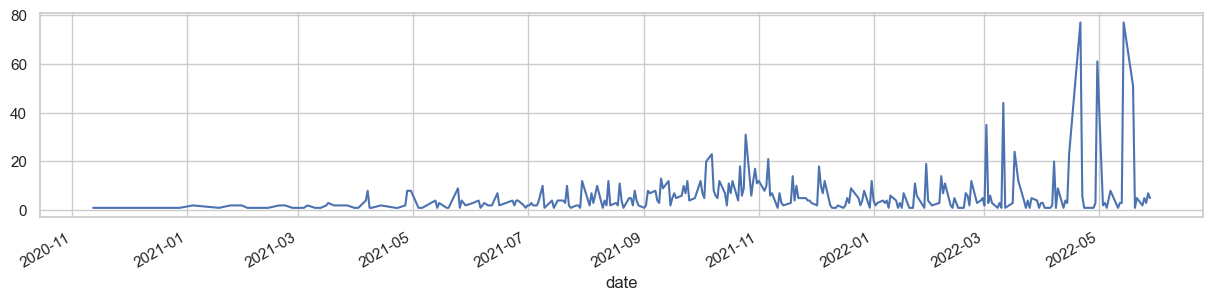

In [7]:
plt.figure(figsize=(15, 3))
df[df['sector'].isnull()].date.value_counts().sort_index().plot()
plt.show()

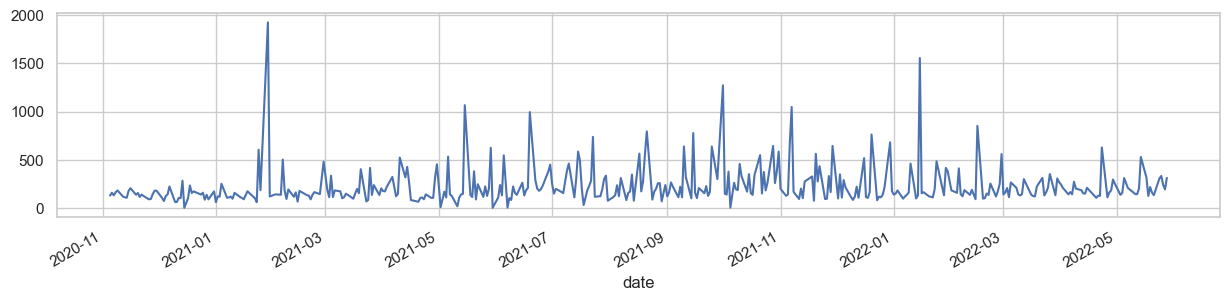

In [8]:
plt.figure(figsize=(15, 3))
df[~df['sector'].isnull()].date.value_counts().sort_index().plot()
plt.show()

In [ ]:
# se aprecia una valor faltante , que se podria conciderar como una categoria 
# hay sectores que tienen un % <1% se deberia analizar agrupar con algun otro similar por tasa de pago 

### fechas

In [40]:
df.head(2)

,date,expirationDate,paymentDate,sector,payerSalesSegment,amountFinanced
0,2022-05-28,2022-06-25,NaT,Ganadería,6,399091.0000
1,2022-05-28,2022-07-12,NaT,Consumo Basico,4,305235.0000


In [10]:
df['expirationDays'] = (df['expirationDate'] - df['date']).dt.days
df['paymentDays'] = np.where(df['paymentDate'].isnull(),(pd.to_datetime('28-05-2022') - df['expirationDate']).dt.days, # fecha de corte "foto"
                             (df['paymentDate'] - df['expirationDate']).dt.days)


C:\Users\alam_\AppData\Local\Temp\ipykernel_24496\2997844457.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['paymentDays'] = np.where(df['paymentDate'].isnull(),(pd.to_datetime('28-05-2022') - df['expirationDate']).dt.days, # fecha de corte "foto"


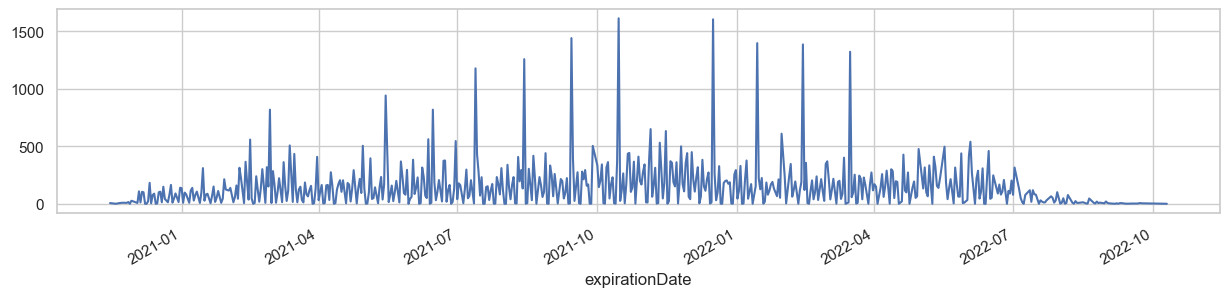

In [11]:
plt.figure(figsize=(15, 3))
df.expirationDate.value_counts().sort_index().plot()
plt.show()

In [102]:
df_.sort_values("id",ascending=False).head()

,id,date,expirationDate,paymentDate,sector,payerSalesSegment,amountFinanced,expirationDays,paymentDays
92211,92211,2022-05-28,2022-06-25,NaT,Ganadería,6,399091.0000,28,-28.0000
92210,92210,2022-05-28,2022-06-10,NaT,Retail,6,3353477.0000,13,-13.0000
92209,92209,2022-05-28,2022-06-23,NaT,NaN,1,1948989.0000,26,-26.0000
92208,92208,2022-05-28,2022-06-25,NaT,Consumo Basico,6,5679275.0000,28,-28.0000
92207,92207,2022-05-28,2022-06-25,NaT,Construcción de Viviendas,5,44030.0000,28,-28.0000


In [61]:
tmp=df_[(df_["paymentDays"]>180)&(~df_["paymentDate"].isnull())].head(1)
tmp

,id,date,expirationDate,paymentDate,sector,payerSalesSegment,amountFinanced,expirationDays,paymentDays
5919,5919,2021-01-04,2021-04-01,2021-12-10,Construcción de Viviendas,4,59126.0000,87,253.0000


In [132]:
df_result[df_result["id"]==5919]

,id,date,expirationDate,paymentDate,sector,payerSalesSegment,amountFinanced,expirationDays,paymentDays,fecha_corte
11971,5919,2021-01-04,2021-04-01,NaT,Construcción de Viviendas,4,59126.0000,87,253.0000,2021-01-31
18341,5919,2021-01-04,2021-04-01,NaT,Construcción de Viviendas,4,59126.0000,87,253.0000,2021-02-28
27149,5919,2021-01-04,2021-04-01,NaT,Construcción de Viviendas,4,59126.0000,87,253.0000,2021-03-31
36477,5919,2021-01-04,2021-04-01,NaT,Construcción de Viviendas,4,59126.0000,87,253.0000,2021-04-30
46015,5919,2021-01-04,2021-04-01,NaT,Construcción de Viviendas,4,59126.0000,87,253.0000,2021-05-31
57331,5919,2021-01-04,2021-04-01,NaT,Construcción de Viviendas,4,59126.0000,87,253.0000,2021-06-30
69661,5919,2021-01-04,2021-04-01,NaT,Construcción de Viviendas,4,59126.0000,87,253.0000,2021-07-31
83572,5919,2021-01-04,2021-04-01,NaT,Construcción de Viviendas,4,59126.0000,87,253.0000,2021-08-31
97970,5919,2021-01-04,2021-04-01,NaT,Construcción de Viviendas,4,59126.0000,87,253.0000,2021-09-30
112259,5919,2021-01-04,2021-04-01,NaT,Construcción de Viviendas,4,59126.0000,87,253.0000,2021-10-31


## Reconstruccion historial

In [135]:
## generar indice por factura
df_=df.sort_values("date").reset_index(drop=True).reset_index(names="id")
df_.head(2)

,id,date,expirationDate,paymentDate,sector,payerSalesSegment,amountFinanced,expirationDays,paymentDays
0,0,2020-11-05,2020-11-15,2020-11-15,Ganadería,6,60265686.0000,10,0.0000
1,1,2020-11-05,2020-12-07,2021-01-04,Telecomunicaciones,5,8804810.0000,32,28.0000


In [ ]:
## Reconstruccion de historial

fecha_fin = df_['date'].max()
current_date = df_['date'].min().replace(day=1)

# Generar todas las fechas de inicio y fin de mes en el rango
fechas_inicio = pd.date_range(start=current_date, end=fecha_fin, freq='MS')
fechas_fin = pd.date_range(start=current_date, end=fecha_fin, freq='ME')

# Almacenar resultados temporalmente en una lista
resultados = []

# Loop por cada rango mensual
for start_date, end_date in zip(fechas_inicio, fechas_fin):
    # Ajustar end_date si excede fecha_fin
    if end_date > fecha_fin:
        end_date = fecha_fin # fecha de ultima foto

    # Filtrar facturas activas del período anterior
    if len(resultados) > 0:
        # Concatenar resultados acumulados
        df_acumulado = pd.concat(resultados, ignore_index=True)
        
        # Obtener facturas activas en la fecha anterior
        fecha_corte_anterior = start_date - pd.Timedelta(days=1)
        df_status = df_[df_["id"].isin(
            df_acumulado[
                (df_acumulado["paymentDate"].isnull()) &
                (df_acumulado["fecha_corte"] == fecha_corte_anterior)
            ]['id'].unique()
        )].copy() 
        df_status["paymentDate"] = np.where(
            df_status["paymentDate"] > end_date, pd.NA, df_status["paymentDate"]
        )
        df_status.loc[:, "fecha_corte"] = end_date
        resultados.append(df_status)

    # Filtrar facturas creadas en el rango actual
    df_tmp_nuevo = df_[df_["date"].between(start_date, end_date)].copy() 
    df_tmp_nuevo["paymentDate"] = np.where(
        df_tmp_nuevo["paymentDate"] > end_date, pd.NA, df_tmp_nuevo["paymentDate"]
    )
    df_tmp_nuevo.loc[:, "fecha_corte"] = end_date
    resultados.append(df_tmp_nuevo)

# Combinar todos los resultados al final
df_result = pd.concat(resultados, ignore_index=True)

# Asegurar formatos de fecha
df_result['paymentDate'] = pd.to_datetime(df_result['paymentDate'])


In [137]:
df_result.head()

,id,date,expirationDate,paymentDate,sector,payerSalesSegment,amountFinanced,expirationDays,paymentDays,fecha_corte
0,0,2020-11-05,2020-11-15,2020-11-15,Ganadería,6,60265686.0000,10,0.0000,2020-11-30
1,1,2020-11-05,2020-12-07,NaT,Telecomunicaciones,5,8804810.0000,32,28.0000,2020-11-30
2,2,2020-11-05,2020-12-30,NaT,Relacionados a Construccion,5,567809.0000,55,-2.0000,2020-11-30
3,3,2020-11-05,2021-03-03,NaT,Minería y Metales,5,715190.0000,118,24.0000,2020-11-30
4,4,2020-11-05,2021-01-11,NaT,Construcción Ingeniería e Infraestructura,5,2902471.0000,67,-8.0000,2020-11-30


In [ ]:
## caso testigo 
df_[(df_["paymentDays"]>180)&(~df_["paymentDate"].isnull())].head(1)

,id,date,expirationDate,paymentDate,sector,payerSalesSegment,amountFinanced,expirationDays,paymentDays
5919,5919,2021-01-04,2021-04-01,2021-12-10,Construcción de Viviendas,4,59126.0000,87,253.0000


In [140]:
df_result['expirationDays'] = (df_result['expirationDate'] - df_result['date']).dt.days
df_result['paymentDays'] = np.where(df_result['paymentDate'].isnull(),(df_result['fecha_corte'] - df_result['expirationDate']).dt.days, # fecha de corte "foto"
                             (df_result['paymentDate'] - df_result['expirationDate']).dt.days)

In [1]:
df_result[df_result["id"]==5919]

NameError: name 'df_result' is not defined

### Conclusiones del Análisis Exploratorio

1. **Concentración de Ventas en Países B y M:** El 95% de las ventas acumuladas provienen de los países B y M. Dado que la base de datos geográfica (`geo.csv`) solo contiene información para estos dos países, se decide enfocar el modelado exclusivamente en ellos.

2. **Manejo de Datos Faltantes en `zipcode`:** Tras filtrar la base de datos para incluir solo los países B y M, se observó que los registros con valores nulos en `zipcode` representan menos del 0.01% del total. Debido a su baja incidencia, se optó por excluir estos registros del análisis.

3. **Imputación de Valores Faltantes en `sales`:** Los valores faltantes en la columna `sales` se imputarán con un valor de 1. Esta decisión se basa en el análisis de la media de ventas para los registros con la misma fecha, producto y ciudad, que es de 1 en la mayoría de los casos. Aunque un pequeño porcentaje de productos presenta una media superior a 1, se decidió optar por una imputación conservadora para simplificar el proceso.
